In [1]:
import personalized_GPR.multivariate as pgm
import numpy as np
import matplotlib.pyplot as plt

# **Uniform prior**

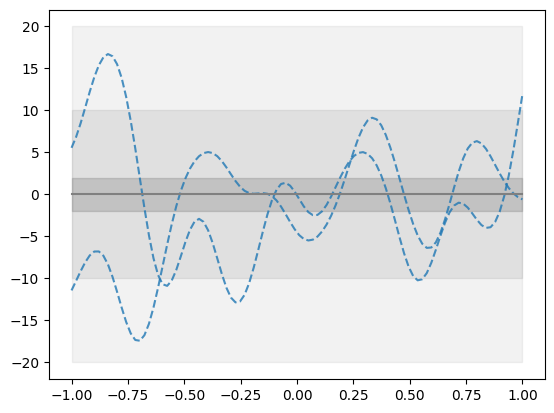

In [2]:
process = pgm.GaussianProcessRegression(correlation_length = 0.2, init_dev=10)

n_sample_line = 2
process.sample_lines_and_plot(n_sample_line)

# **Add some data**

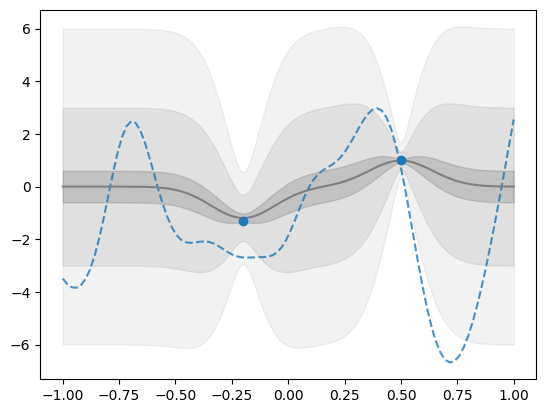

In [25]:
process = pgm.GaussianProcessRegression(correlation_length = 0.2, init_dev=3)

datas = [
        [0.5, 1, 0.1],
        [-0.2, -1.3, 0.3],
        ]

data_x = np.array([data_[0] for data_ in datas])
data_y = np.array([data_[1] for data_ in datas])
err = np.array([data_[2] for data_ in datas])
process.add_data_points(data_x, data_y, err)

process.sample_lines_and_plot(1)

# **Non uniform prior**

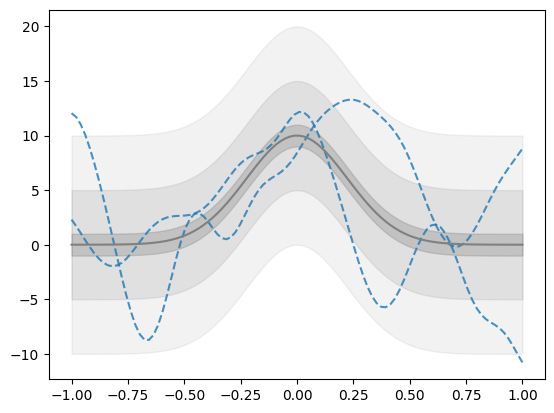

In [11]:
def prior(*pars):
    return np.e**(-np.sum(pars)**2/0.1)*10

process = pgm.GaussianProcessRegression(correlation_length = 0.2, prior=prior, init_dev=5)

n_sample_line = 2
process.sample_lines_and_plot(n_sample_line)

# **Add some data**

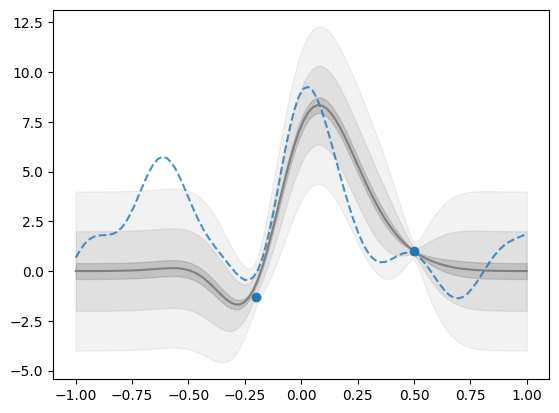

In [14]:
process = pgm.GaussianProcessRegression(correlation_length = 0.2, prior=prior, init_dev=2)

datas = [
        [0.5, 1, 0.1],
        [-0.2, -1.3, 0.3],
        ]

data_x = np.array([data_[0] for data_ in datas])
data_y = np.array([data_[1] for data_ in datas])
err = np.array([data_[2] for data_ in datas])
process.add_data_points(data_x, data_y, err)

process.sample_lines_and_plot(1)

# **Experiment simulation**

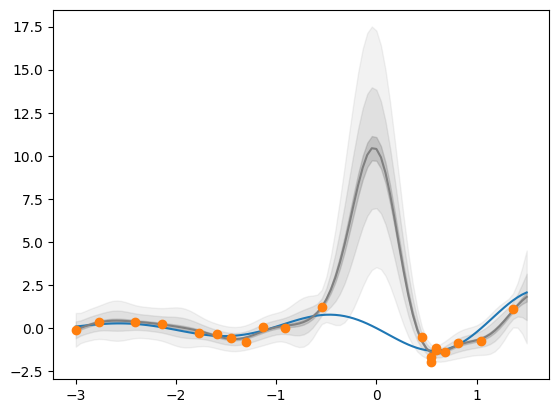

In [20]:
def run_experiment(parameters, dev=0):
    cost = -np.sin(3*parameters[0])*np.exp(.5*parameters[0]) + np.random.normal(0, dev)
    err = 0.1
    return np.array([cost]), np.array([err])

process = pgm.GaussianProcessRegression(correlation_length = 0.5, domine=[-3,1.5], prior=prior, init_dev=5)

_pars = [np.random.uniform(process.domine[0], process.domine[1])]
n_iteration = 20

for i in range(n_iteration):
    
    fi = np.random.uniform(0, 1)

    if fi < 0.3:
        _pars = np.array([np.random.uniform(process.domine[0], process.domine[1])])
    else:
        _pars, _ = process.sample_minarg()

    #process.plot_probability_region()
    cost, err = run_experiment(_pars, dev = 0.4)
    process.add_data_points(_pars, cost, err)
    #plt.show()
    

x = np.linspace(process.domine[0], process.domine[1], process.n_samples_for_line)
y = [run_experiment([x_])[0] for x_ in x]
plt.plot(x,y)

process.sample_lines_and_plot(0)
plt.show()

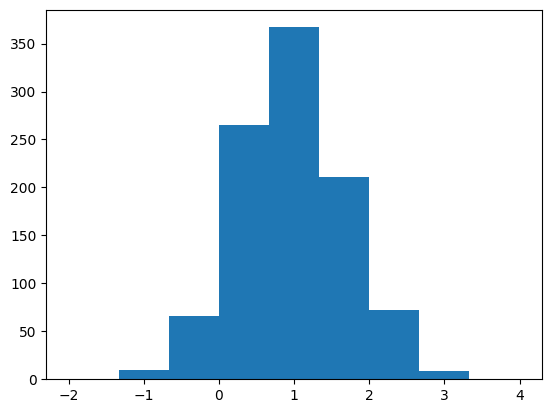

In [7]:
ms =np.array([1,1])
cov = ([[0.5,0.1],
        [0.1,0.5]
])

y=[]
for i in range(1000):
    y.append(np.random.multivariate_normal(ms,cov)[0])


plt.hist(y, bins=np.linspace(-2,4,10))
plt.show()

In [8]:
vec = np.random.random(size=2)*10 - 5
mat = np.array([[2,1.99],
                [1.99,3]
])
dott = vec.dot(mat.dot(vec))

print(vec)
print(dott)

[-4.31186277  3.92223492]
16.025789274739253


In [9]:
np.linalg.eigvals(mat)

array([0.44814718, 4.55185282])